### Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

### Dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),(imagens_teste, identificacoes_teste)) = dataset.load_data()

### Pequena Exploração

In [3]:
print('Número de imagens e tamanhos')
imagens_treino.shape, imagens_teste.shape, imagens_teste.shape, identificacoes_teste.shape

Número de imagens e tamanhos


((60000, 28, 28), (10000, 28, 28), (10000, 28, 28), (10000,))

### Exibição

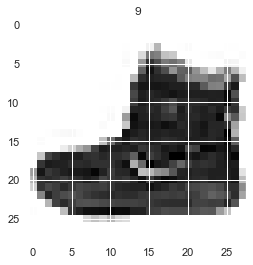

In [4]:
plt.title(identificacoes_treino[0])
plt.imshow(imagens_treino[0], cmap='binary')

In [5]:
print(identificacoes_treino.min(), identificacoes_treino.max())

0 9


In [6]:
# nomes das classificações retiradas do github original do dataset
nomes_classificacoes = ['camiseta','calca', 'pullover','vestido', 
                        'casaco','sandalia','camisa','tenis','bolsa','bota']

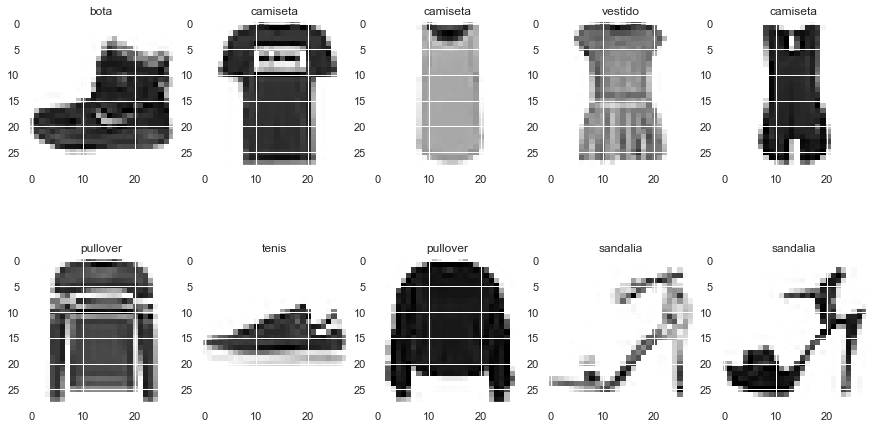

In [7]:
plt.figure(figsize=(15,8))
for imagem in range(10):
    plt.subplot(2,5,imagem+1)
    plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
    plt.imshow(imagens_treino[imagem], cmap='binary')

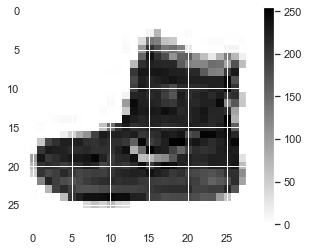

In [8]:
plt.imshow(imagens_treino[0], cmap='binary')
plt.colorbar()

In [9]:
imagens_treino = imagens_treino/255. #normalização

### Criação do modelo

In [10]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2), 
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

In [11]:
modelo_sem_camada_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

A adição da camada Dropout na rede ajuda com o problema de overfitting.<br/>
Neste caso melhorou a acurácia do modelo e a sua perda, como é demonstrado abaixo

In [12]:
modelo.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
modelo_sem_camada_dropout.compile(optimizer='adam', 
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5289 - accuracy: 0.8117 - val_loss: 0.3971 - val_accuracy: 0.8571
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3995 - accuracy: 0.8549 - val_loss: 0.3685 - val_accuracy: 0.8627
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3578 - accuracy: 0.8689 - val_loss: 0.3744 - val_accuracy: 0.8624
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3410 - accuracy: 0.8741 - val_loss: 0.3315 - val_accuracy: 0.8798
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3225 - accuracy: 0.8813 - val_loss: 0.3287 - val_accuracy: 0.8809


In [14]:
historico_sem_droput = modelo_sem_camada_dropout.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4975 - accuracy: 0.8244 - val_loss: 0.4133 - val_accuracy: 0.8518
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3731 - accuracy: 0.8646 - val_loss: 0.3570 - val_accuracy: 0.8721
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3338 - accuracy: 0.8786 - val_loss: 0.3513 - val_accuracy: 0.8727
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3090 - accuracy: 0.8849 - val_loss: 0.3520 - val_accuracy: 0.8749
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2882 - accuracy: 0.8928 - val_loss: 0.3361 - val_accuracy: 0.8783


In [15]:
def show_history(history):
    plt.figure(figsize=(8,12))
    plt.subplot(2, 1, 1)
    plt.title('Acurácia por Épocas')
    plt.plot(history['accuracy'], label='treino')
    plt.plot(history['val_accuracy'], label='validação')
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.title('Perda por Épocas')
    plt.plot(history['loss'], label='treino')
    plt.plot(history['val_loss'], label='validação')
    plt.ylabel('Perda')
    plt.xlabel('Épocas')
    plt.legend()

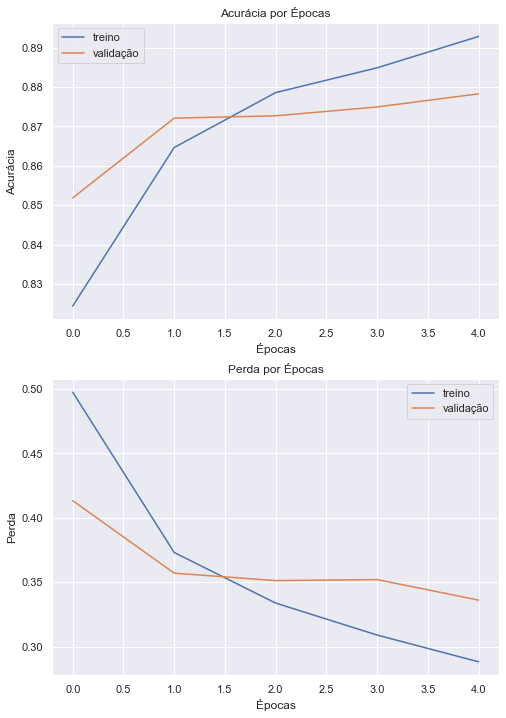

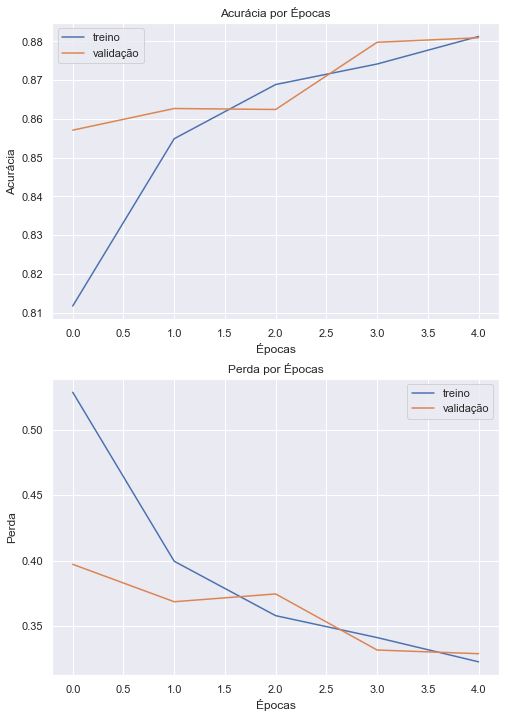

In [16]:
show_history(historico_sem_droput.history)
show_history(historico.history)


In [17]:
testes = modelo.predict(imagens_teste)

In [18]:
elemento = 1
print(f'resultado teste {np.argmax(testes[elemento])}')
print(f'número da imagem de teste {identificacoes_teste[elemento]}')

resultado teste 2
número da imagem de teste 2


In [21]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'perda do teste: {perda_teste}')
print(f'acuracia do teste: {acuracia_teste}')

313/313 [==============================] - 1s 1ms/step - loss: 52.4987 - accuracy: 0.8616
perda do teste: 52.498661041259766
acuracia do teste: 0.8615999817848206


### Salvando e usando o modelo pronto

In [20]:
modelo.save('modelo.h5')

In [22]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('modelo.h5')

In [23]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'resultado teste modelo salvo {np.argmax(testes[elemento])}')
print(f'número da imagem de teste do modelo salvo {identificacoes_teste[elemento]}')

resultado teste modelo salvo 2
número da imagem de teste do modelo salvo 2
